<a href="https://colab.research.google.com/github/akash-ozil/AI-Fundamentals-Updated/blob/main/Pytorch_Deep_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as td

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
occupancy_detection = fetch_ucirepo(id=357)

# data (as pandas dataframes)
X = occupancy_detection.data.features
y = occupancy_detection.data.targets

# Concatenate features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

In [4]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065,1.0
2,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199,1.0
3,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175,1.0
4,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518,1.0


In [5]:
df.shape

(20562, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20562 non-null  object 
 1   Temperature    20562 non-null  object 
 2   Humidity       20562 non-null  object 
 3   Light          20562 non-null  object 
 4   CO2            20562 non-null  object 
 5   HumidityRatio  20562 non-null  object 
 6   Occupancy      20560 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
date,0
Temperature,0
Humidity,0
Light,0
CO2,0
HumidityRatio,0
Occupancy,2


In [8]:
df['Occupancy'].unique()

array([ 1.,  0., nan])

In [9]:
df['Occupancy'].value_counts()

,count
Occupancy,
0.0,15810
1.0,4750


In [10]:
df['Occupancy'].value_counts() / df.shape[0]

,count
Occupancy,
0.0,0.768894
1.0,0.231009


In [11]:
df['date'].min()

'2015-02-02 14:19:00'

In [12]:
df['date'].max()

'Temperature'

In [13]:
df[df['date'] == 'Temperature']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8143,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,NaN
10809,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,NaN


In [14]:
df.dropna(subset=['Occupancy'], inplace=True)

In [15]:
df[df['date'] == 'Temperature']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy


In [16]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract the numerical representation of the date (e.g., number of days since a reference date)
df['date_numeric'] = (df['date'] - df['date'].min()).dt.days

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,date_numeric
0,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529,1.0,2
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065,1.0,2
2,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199,1.0,2
3,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175,1.0,2
4,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518,1.0,2


In [17]:
df.drop(['date'], axis = 1, inplace = True)

In [18]:
# prompt: normalize the data frame

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
# Separate the target variable ('Occupancy') from the features
X = df.drop('Occupancy', axis=1)
y = df['Occupancy']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features and target variable back together
normalized_df = pd.concat([X_scaled_df, y], axis=1)

# Now 'normalized_df' contains your normalized data
normalized_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,date_numeric,Occupancy
0,0.772881,0.462624,0.250994,0.185424,0.557318,0.133333,1.0
1,0.767334,0.462426,0.253056,0.181067,0.554807,0.133333,1.0
2,0.767334,0.461437,0.250994,0.180766,0.553761,0.133333,1.0
3,0.767334,0.459459,0.250994,0.177611,0.551669,0.133333,1.0
4,0.758089,0.459459,0.250994,0.175357,0.547851,0.133333,1.0


In [19]:
normalized_df.shape

(20562, 7)

In [20]:
normalized_df['Occupancy'].unique()

array([ 1.,  0., nan])

In [21]:
normalized_df.dropna(subset=['Occupancy'], inplace=True)

In [22]:
normalized_df['Occupancy'].unique()

array([1., 0.])

In [23]:
for column in normalized_df.columns:
  print(f"Column: {column}")
  print(f"  Max: {normalized_df[column].max()}")
  print(f"  Min: {normalized_df[column].min()}")


Column: Temperature
  Max: 1.0000000000000004
  Min: 0.0
Column: Humidity
  Max: 1.0
  Min: 0.0
Column: Light
  Max: 1.0
  Min: 0.0
Column: CO2
  Max: 1.0
  Min: 0.0
Column: HumidityRatio
  Max: 1.0
  Min: 0.0
Column: date_numeric
  Max: 1.0
  Min: 0.0
Column: Occupancy
  Max: 1.0
  Min: 0.0


In [24]:
normalized_df['Temperature'] = np.where(normalized_df['Temperature'] > 1, 1, normalized_df['Temperature'])

# Verify the changes
print(normalized_df['Temperature'].max())

1.0


In [25]:
normalized_df.shape

(20560, 7)

In [26]:
normalized_df.dropna(inplace=True)

In [27]:
normalized_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,date_numeric,Occupancy
0,0.772881,0.462624,0.250994,0.185424,0.557318,0.133333,1.0
1,0.767334,0.462426,0.253056,0.181067,0.554807,0.133333,1.0
2,0.767334,0.461437,0.250994,0.180766,0.553761,0.133333,1.0
3,0.767334,0.459459,0.250994,0.177611,0.551669,0.133333,1.0
4,0.758089,0.459459,0.250994,0.175357,0.547851,0.133333,1.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

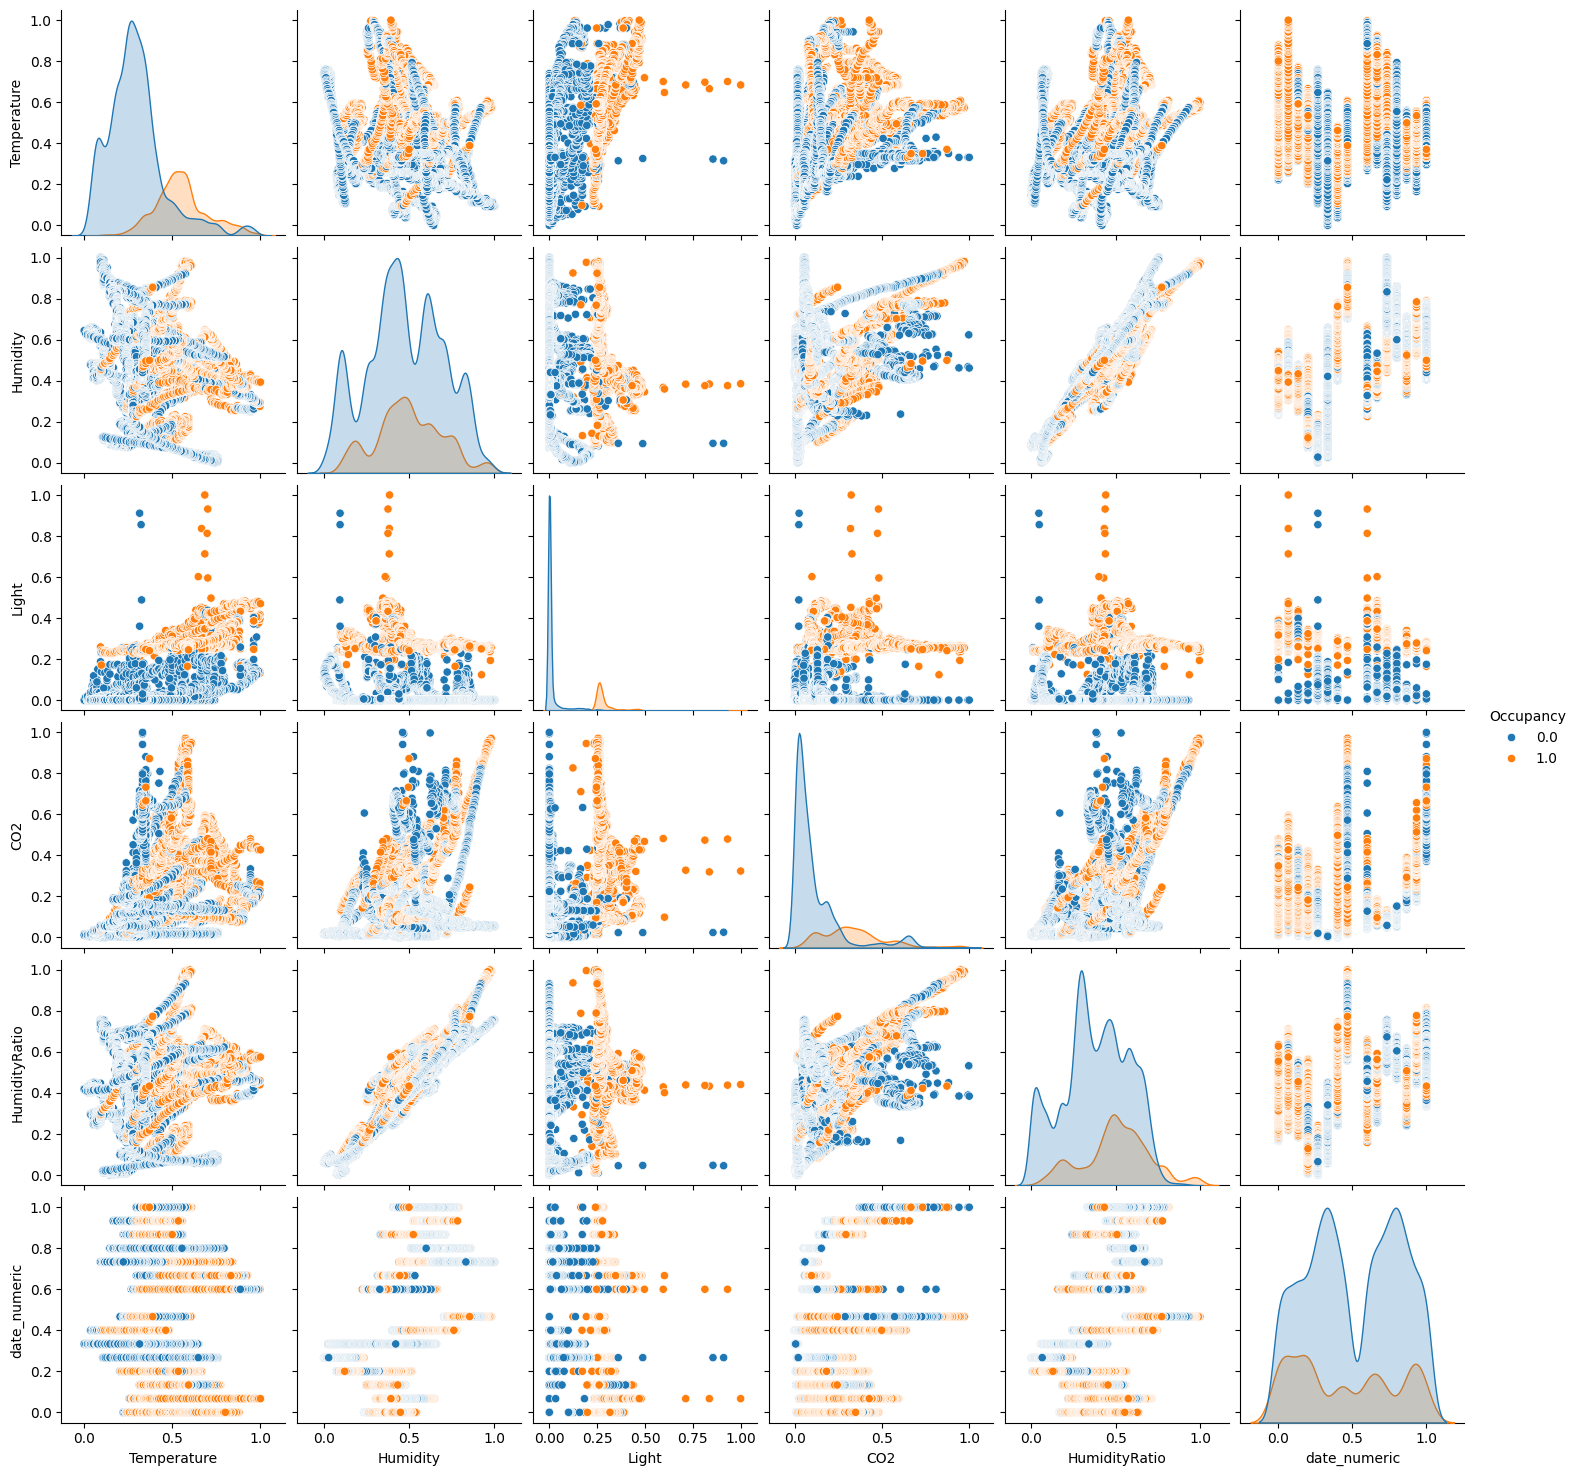

In [28]:
sns.pairplot(normalized_df, hue="Occupancy")

In [29]:
# Step 3: Standardize the data
X = torch.tensor(normalized_df.drop('Occupancy', axis=1).values, dtype=torch.float32)
y = torch.tensor(normalized_df['Occupancy'], dtype=torch.float32).view(-1, 1)

In [30]:
X.shape, y.shape

(torch.Size([20558, 6]), torch.Size([20558, 1]))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Step 4: Create DataLoader for batch processing
batch_size = 32
train_dataset = td.TensorDataset(X_train, y_train)
X_train_loader = td.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [33]:
train_dataset

In [154]:
# Step 5: Define the neural network model
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super(BinaryClassificationModel, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(6, 100, bias=False),  # input_shape=(2,), output_shape=1 (for binary classification)
            nn.BatchNorm1d(100, affine=False),
            nn.ReLU(),

            nn.Linear(100, 100, bias=False),
            nn.BatchNorm1d(100, affine=False),
            nn.ReLU(),

            nn.Linear(100, 1, bias=False),
            nn.Sigmoid()      # sigmoid activation for binary output
        )

    def forward(self, x):
      activations = []  # List to store activations
      for layer in self.layer:
        x = layer(x)
        if isinstance(layer, nn.ReLU):  # Collect activations from ReLU layers
          activations.append(x)
      return activations, x
        # return self.layer(x)

# Step 6: Instantiate the model, define loss function and optimizer
model = BinaryClassificationModel()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.025)

In [155]:
print(model)

BinaryClassificationModel(
  (layer): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=False)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=100, bias=False)
    (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=1, bias=False)
    (7): Sigmoid()
  )
)


In [156]:
# Step 7: Training the model with batch processing
epochs=10

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in X_train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        activations, y_pred = model(X_batch)
        # print(y_pred, y_batch)
        # print(activations)
        # Compute the loss
        loss = criterion(y_pred, y_batch)
        epoch_loss += loss.item()
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Print the loss after each epoch
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(X_train_loader):.4f}')

Epoch 1/10, Loss: 0.0776
Epoch 2/10, Loss: 0.0591
Epoch 3/10, Loss: 0.0541
Epoch 4/10, Loss: 0.0541
Epoch 5/10, Loss: 0.0506
Epoch 6/10, Loss: 0.0509
Epoch 7/10, Loss: 0.0489
Epoch 8/10, Loss: 0.0479
Epoch 9/10, Loss: 0.0446
Epoch 10/10, Loss: 0.0466


In [151]:
# y_pred

In [157]:
# Step 7: Evaluate the model
model.eval()
with torch.no_grad():
    activations, y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

    accuracy = (y_pred == y_test).float().mean()
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 98.62%


In [158]:
y_pred.unique()

tensor([0., 1.])

In [75]:
# # Plot weight distributions before training
# for name, param in model.named_parameters():
#   print(name, param.requires_grad, param.detach())

In [159]:
for name, param in model.named_parameters():
  print('-'*66)
  print(name)
  print('_'*66)
  print(param)

------------------------------------------------------------------
layer.0.weight
__________________________________________________________________
Parameter containing:
tensor([[ 1.5935e+00,  1.2498e+00,  4.3403e-01,  5.8042e-03,  3.6085e+00,
          1.5830e-01],
        [-5.2321e-01, -7.8839e-01,  8.9196e-01, -4.3713e+00, -8.5707e-01,
          1.4779e+00],
        [ 1.8756e+00,  3.6682e-01, -1.7298e+00, -2.4673e-01,  1.6595e+00,
         -8.3070e-01],
        [ 2.1236e+00,  4.8938e-01, -2.2557e+00, -3.2717e-01,  1.4037e+00,
         -8.2711e-01],
        [-1.5371e+00, -6.3736e-02, -1.0197e+00,  2.8271e+00, -6.1608e-01,
         -1.7126e+00],
        [ 7.5810e-01,  5.8938e-01, -1.1058e+00, -2.5031e+00,  1.0043e+00,
         -1.1677e+00],
        [-1.2658e-01, -1.1173e+00,  1.3314e-01, -3.2291e+00, -1.0521e+00,
          1.4524e+00],
        [ 8.2275e-01,  9.9281e-01,  1.0273e+00,  1.3400e-01,  3.2409e+00,
          7.4095e-01],
        [-1.2218e+00,  2.4788e-01, -2.7604e+00,  1.33

Layer 0 (ReLU): mean +0.41, std 0.54, saturated 46.36% (dead neurons)
Layer 1 (ReLU): mean +0.42, std 0.54, saturated 48.32% (dead neurons)


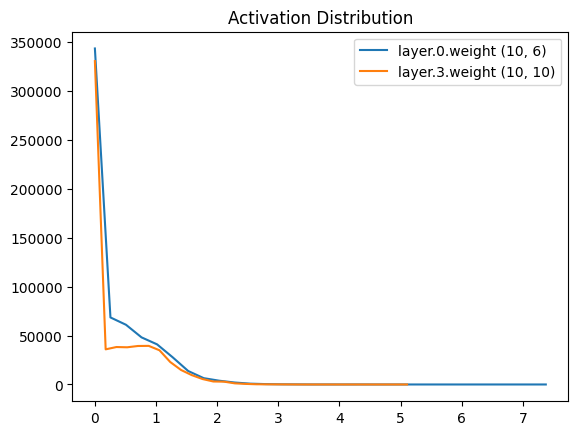

In [160]:
# Iterate through activations and plot histograms
for i, activation in enumerate(activations):
    print(f'Layer {i} (ReLU): mean {activation.mean():+.2f}, std {activation.std():.2f}, '
          f'saturated {(activation == 0).float().mean() * 100:.2f}% (dead neurons)')

    # Compute histogram (without density)
    hy, hx = torch.histogram(activation, bins=30)  # Use bins=30 for finer histogram
    plt.plot(hx[:-1].detach(), hy.detach())  # Plot histogram
    legends.append(f'Layer {i} (ReLU)')      # Legend for each ReLU layer

# Add legends and title
plt.legend(legends)
plt.title('Activation Distribution')
plt.show()

weight   (100, 6) | mean -0.156129 | std 1.417026e+00 | grad:data ratio 1.000000e+00
weight (100, 100) | mean +0.000551 | std 9.998592e-01 | grad:data ratio 1.000000e+00
weight   (1, 100) | mean -0.325298 | std 5.173884e-01 | grad:data ratio 1.000000e+00


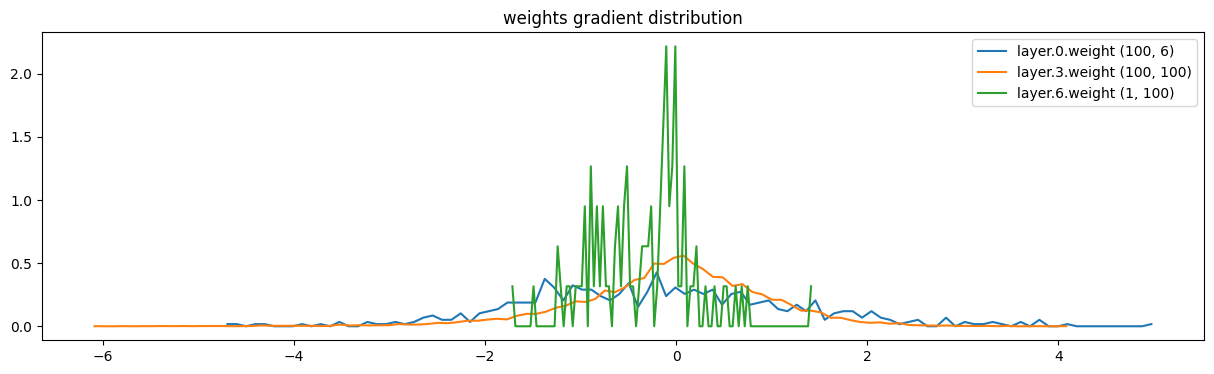

In [161]:
plt.figure(figsize=(15, 4)) # width and height of the plot
legends = []

# Plot weight distributions before training
for i, p in model.named_parameters():
  t = p
  if p.requires_grad:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach().numpy().flatten(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')

plt.legend(legends)
plt.title('weights gradient distribution');

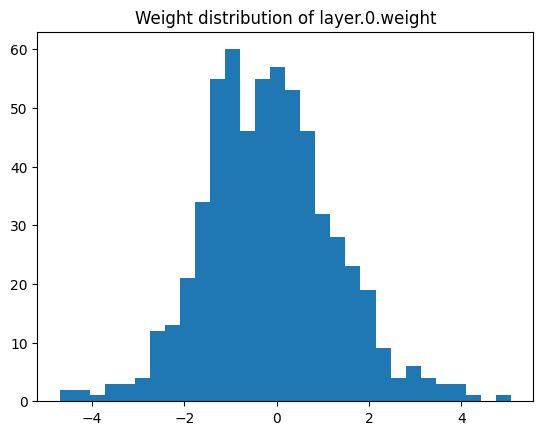

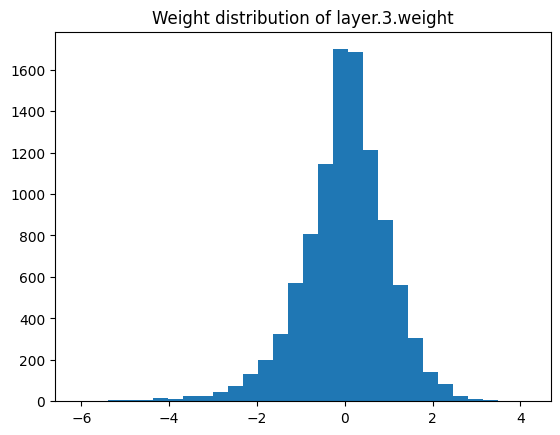

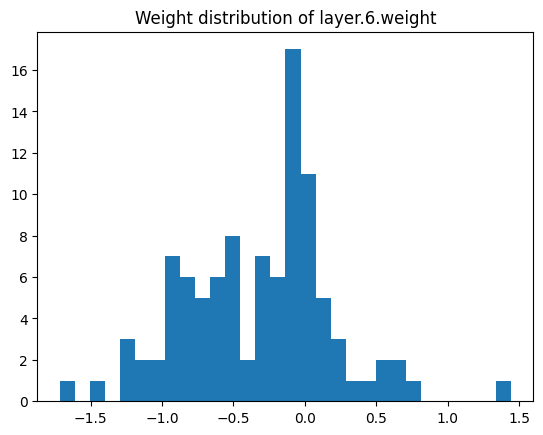

In [162]:
# Plot weight distributions before training
# def plot_weight_distribution(model):
#     for name, param in model.named_parameters():
#         if param.requires_grad:
#             plt.hist(param.detach().numpy().flatten(), bins=30)
#             plt.title(f'Weight distribution of {name}')
#             plt.show()

# # Call this function to visualize the weight distribution
# plot_weight_distribution(model)


In [164]:
# Store initial weights
initial_weights = {name: param.clone().detach() for name, param in model.named_parameters() if param.requires_grad}

# After each training step, compare weights
def print_weight_updates(model, initial_weights):
    for name, param in model.named_parameters():
        if param.requires_grad:
            weight_update = torch.norm(param - initial_weights[name])
            print(f"Update for {name}: {weight_update.item()}")

# During training, after optimizer.step(), call:
print_weight_updates(model, initial_weights)


Update for layer.0.weight: 0.0
Update for layer.3.weight: 0.0
Update for layer.6.weight: 0.0
